In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from MPCProblem import MPCProblem
from util import *
import cvxpy as cp
import warnings
import itertools
import time
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import graphviz
import pydotplus
from datetime import datetime
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.metrics import brier_score_loss
from scipy import stats
import matplotlib.dates as md
warnings.filterwarnings('ignore')

In [2]:
Rmax_con = [150, 50, 9, 6, 8, 8]
RR_con = [50, 14, 9, 6, 8, 8]

baseline_TOCS = [733, 211, 558, 285, 319, 355]
perfect_TOCS = [0, 0, 449, 212, 199, 234]
hefs_TOCS = [0, 0, 481, 215, 239, 282]

peak_flows = [310.995288, 95.952598, 140.088000, 67.040000, 77.467000, 83.829000] # kcfs
flood_pools = [750, 170, 340, 350, 170, 450] # TAF
sites = ['ORDC1', 'NBBC1', 'NDPC1', 'EXQC1', 'FRAC1', 'NMSC1']
Rmax_con = [150, 50, 9, 6, 8, 8]
RR_con = [50, 14, 9, 6, 8, 8]


df_useful = pd.DataFrame({"peak_flow":peak_flows,"flood_pool":flood_pools,
                          "Rmax_con": Rmax_con, "RR_con":RR_con,
                          "baseline_TOCS":baseline_TOCS,
                          "perfect_TOCS":perfect_TOCS,
                          "hefs_TOCS":hefs_TOCS}, index = sites)

ratio = []
for n in range(6):
    ratio.append(peak_flows[n] * kcfs_to_tafd / flood_pools[n])

# peak flow taf
df_useful['peak_flow_taf'] = df_useful['peak_flow']*kcfs_to_tafd

# Rmax ratio

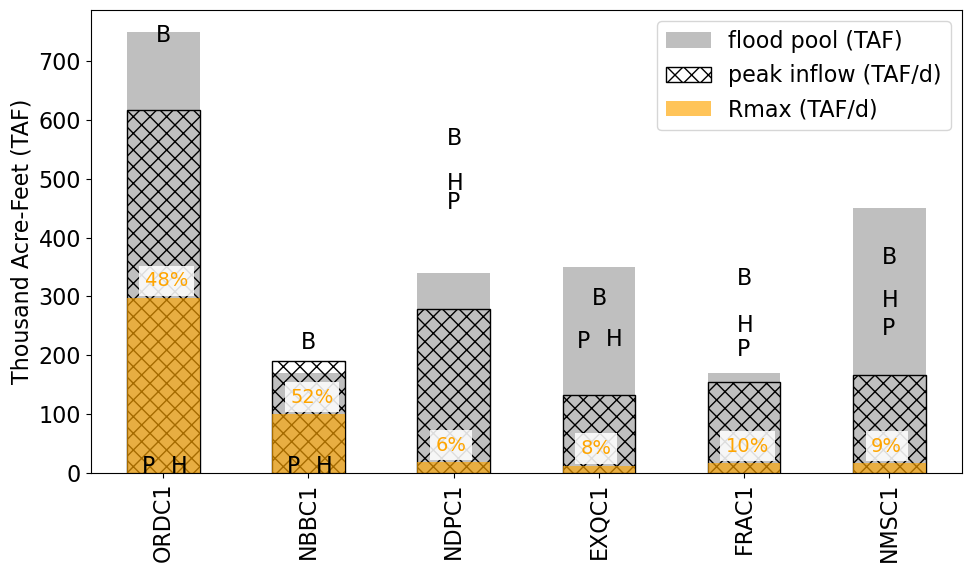

In [3]:
fontsize = 16
plt.rcParams.update({'font.size': fontsize})
fig, ax = plt.subplots()
df_useful['flood_pool'].plot.bar(ax = ax, alpha = 0.5, color = 'gray', figsize = (10,6))
df_useful['peak_flow_taf'].plot.bar(ax = ax, color = 'none', edgecolor = 'black', hatch='XX')
(df_useful['Rmax_con'] * kcfs_to_tafd).plot.bar(ax = ax, color = 'orange', alpha = 0.65)

ax.legend(['flood pool (TAF)','peak inflow (TAF/d)', 'Rmax (TAF/d)'])
ax.set_ylabel('Thousand Acre-Feet (TAF)')
markers = ["o", "O", "x"]
offset = 0.05
ph_off = 0.1
offset_p = offset + ph_off
offset_h = offset - ph_off
color = 'black'
fs = 16
for n in range(6):
    ax.text(n-offset,df_useful['baseline_TOCS'].iloc[n], "B", fontsize=fs, color=color)

    if np.abs(df_useful['perfect_TOCS'].iloc[n] - df_useful['hefs_TOCS'].iloc[n])<20:
        ax.text(n-offset_p,df_useful['perfect_TOCS'].iloc[n], "P", fontsize=fs, color=color)
        ax.text(n-offset_h,df_useful['hefs_TOCS'].iloc[n], "H", fontsize=fs, color=color)

    else:
        ax.text(n-offset,df_useful['perfect_TOCS'].iloc[n], "P", fontsize=fs, color=color)
        ax.text(n-offset,df_useful['hefs_TOCS'].iloc[n], "H", fontsize=fs, color=color)

    # calculate Rmax per and annotate
    rmax_per = int(100* df_useful['Rmax_con'][n]/peak_flows[n])
    ax.text(n-offset-0.075, kcfs_to_tafd*(df_useful['Rmax_con'].iloc[n]) + 20, str(rmax_per) + "%",
            bbox=dict(facecolor='white', edgecolor='none', alpha = 0.87), fontsize = 14,color = 'orange')
plt.tight_layout()